## Task-2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## 1.EDA

In [3]:
df= pd.read_csv("dataset_task2.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df["Gender"]=df["Gender"].map({"Male":1, "Female":0})

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [9]:
df.rename(columns={
    "Annual Income (k$)":"Annual Income",
    "Spending Score (1-100)":"Spending Score"},inplace = True)

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## observations-
* no null values
* no extreme outliers, may be part of a high-income/spending score cluster
  

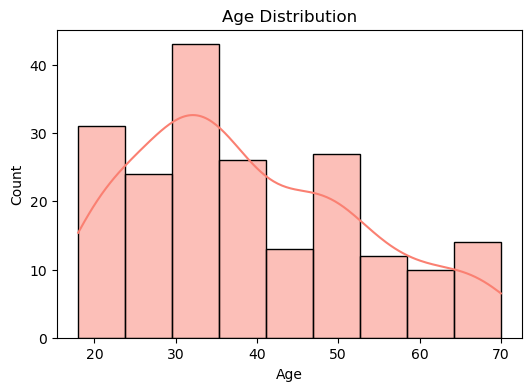

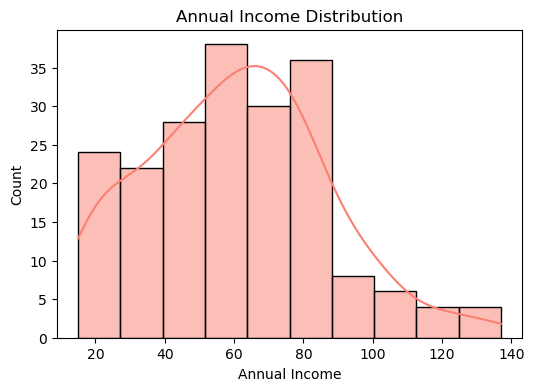

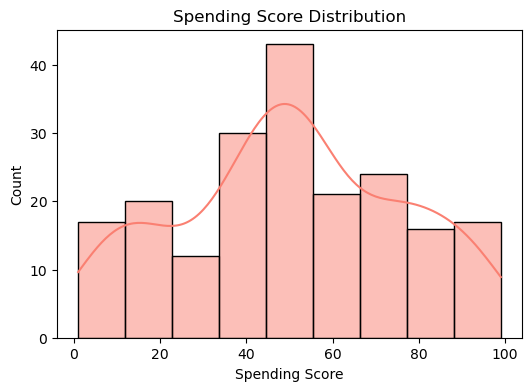

In [12]:
num_cols = ["Age", "Annual Income","Spending Score"]
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True,color="salmon" ) #kde=kernel density estimation
    plt.title(f"{col} Distribution")
    plt.show()

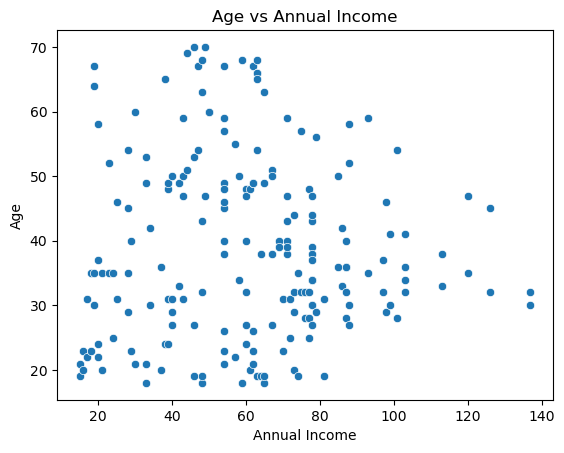

In [13]:
sns.scatterplot(x="Annual Income", y="Age",data=df)
plt.title("Age vs Annual Income")
plt.show()

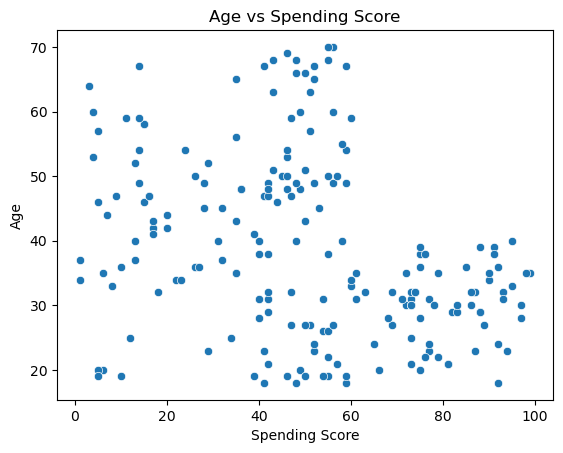

In [14]:
sns.scatterplot(x="Spending Score", y="Age",data=df)
plt.title("Age vs Spending Score")
plt.show()

## Age vs 
* Annual income - nothing unusual observe
* Spending score - younger people tend to have higher spending score...again nothing unsusual

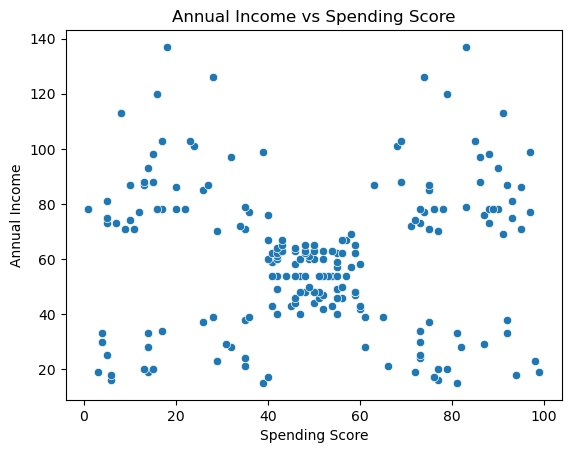

In [15]:
sns.scatterplot(x="Spending Score", y="Annual Income",data=df)
plt.title("Annual Income vs Spending Score")
plt.show()

## Annual Income vs Spending Score
## we start to observe potential clusters..
* High income - low spending
* High income - high spending
* Low income - low spending
* Low income - high spending

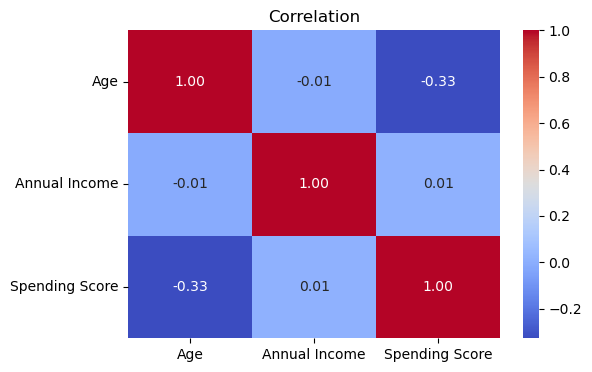

In [16]:
df_corr = df.copy()
num_cols = ["Age","Annual Income","Spending Score"]
corr = df_corr[num_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation")
plt.show()

* Moderate negative correlation between Age and Spending score as understood above

## Scaling

In [17]:
df = df.drop(["CustomerID"],axis=1)

In [18]:
df.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler= StandardScaler()

In [21]:
cols= ["Age","Annual Income","Spending Score"]
scaled_data= scaler.fit_transform(df[cols])

In [22]:
scaled_df = pd.DataFrame(scaled_data, columns=cols)

In [23]:
scaled_df.head()

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## PCA!!!!

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca2=PCA(n_components=2)

In [26]:
data_pca2= pca2.fit_transform(scaled_data)

In [27]:
data_pca2

array([[-6.15720019e-01, -1.76348088e+00],
       [-1.66579271e+00, -1.82074695e+00],
       [ 3.37861909e-01, -1.67479894e+00],
       [-1.45657325e+00, -1.77242992e+00],
       [-3.84652078e-02, -1.66274012e+00],
       [-1.48168526e+00, -1.73500173e+00],
       [ 1.09461665e+00, -1.56610230e+00],
       [-1.92630736e+00, -1.72111049e+00],
       [ 2.64517786e+00, -1.46084721e+00],
       [-9.70130513e-01, -1.63558108e+00],
       [ 2.49568861e+00, -1.47048914e+00],
       [-1.45688256e+00, -1.66436050e+00],
       [ 2.01018729e+00, -1.45329897e+00],
       [-1.41321072e+00, -1.61776746e+00],
       [ 1.00042965e+00, -1.49579176e+00],
       [-1.56943170e+00, -1.62502669e+00],
       [ 2.94060318e-01, -1.49425585e+00],
       [-1.31624924e+00, -1.57216383e+00],
       [ 1.31669910e+00, -1.37243404e+00],
       [-1.43679899e+00, -1.51039469e+00],
       [ 2.88561175e-01, -1.37988135e+00],
       [-1.26018513e+00, -1.45723906e+00],
       [ 1.66684303e+00, -1.27396755e+00],
       [-9.

In [28]:
pca2.explained_variance_

array([1.33465831, 1.00427272])

In [29]:
pca2.explained_variance_ratio_

array([0.44266167, 0.33308378])

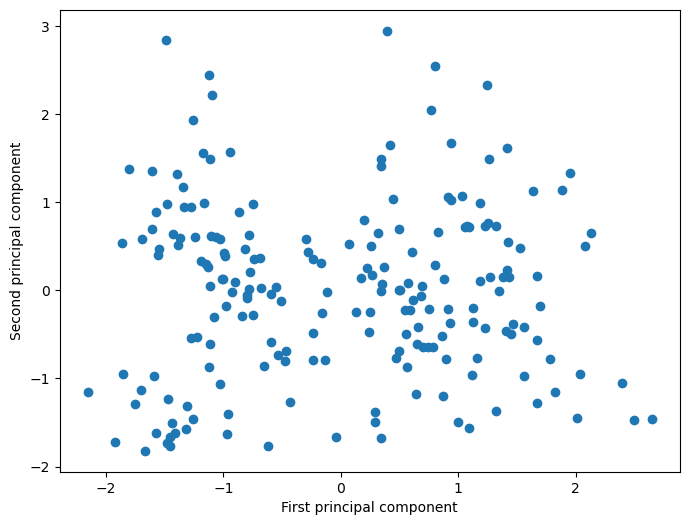

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca2[:,0],data_pca2[:,1],cmap="plasma")
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

## Clustering Techniques

## 1. K-Means

In [31]:
from sklearn.cluster import KMeans

In [32]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [33]:
wcss=[]
for k in range(1,15):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(data_pca2)
    wcss.append(kmeans.inertia_)

  File "C:\Users\sktmb\Desktop\sample_project_1\env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\sktmb\Desktop\sample_project_1\env\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sktmb\Desktop\sample_project_1\env\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^

In [34]:
wcss

[465.44727401860484,
 254.84344469415782,
 177.38814740377936,
 154.26072905102376,
 99.24925406962468,
 82.33353761350867,
 71.86791475030124,
 60.69822119148564,
 50.700384586499865,
 44.82407625305885,
 40.602918322582454,
 39.190194075134926,
 32.93984663116415,
 32.24908549567853]

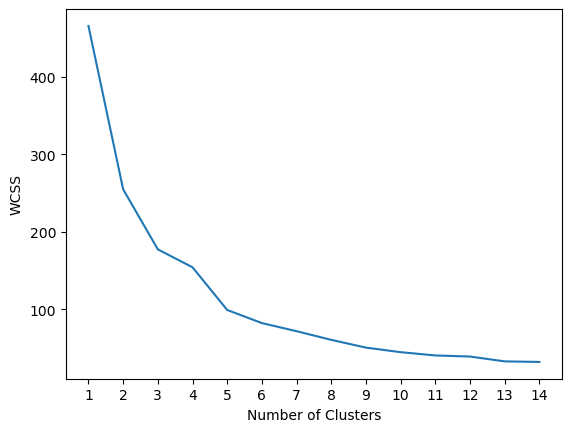

In [45]:
plt.plot(range(1,15),wcss)
plt.xticks(range(1,15))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [46]:
for k in [3, 4, 5, 6]:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(data_pca2)
    sil = silhouette_score(data_pca2, labels)
    print(f"k={k}, silhouette={sil:.4f}")

k=3, silhouette=0.4136
k=4, silhouette=0.4209
k=5, silhouette=0.3898
k=6, silhouette=0.3775


In [47]:
for k in [3, 4, 5, 6]:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(data_pca2)
    dbi = davies_bouldin_score(data_pca2, labels)
    print(f"k={k}, DBI ={dbi:.4f}")

k=3, DBI =0.8226
k=4, DBI =0.8247
k=5, DBI =0.8075
k=6, DBI =0.8564


In [48]:
for k in [3, 4, 5, 6]:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(data_pca2)
    ch  = calinski_harabasz_score(data_pca2, labels)
    print(f"k={k}, CH ={ch:.4f}")

k=3, CH =160.1835
k=4, CH =182.0798
k=5, CH =180.5689
k=6, CH =184.4668


 doubt

In [49]:
from kneed import KneeLocator

In [52]:
kl=KneeLocator(range(1,15),wcss,curve = "convex",direction="decreasing")
kl.elbow

np.int64(5)

In [53]:
kmeans= KMeans(n_clusters=4,init="k-means++")

In [54]:
labels =kmeans.fit_predict(data_pca2)
labels

array([2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1,
       1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

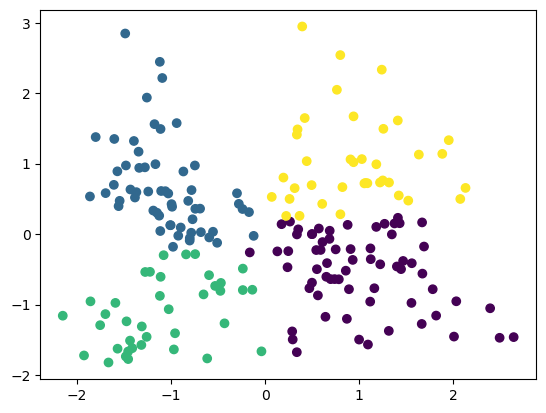

In [55]:
plt.scatter(data_pca2[:,0],data_pca2[:,1],c=labels)
plt.show()

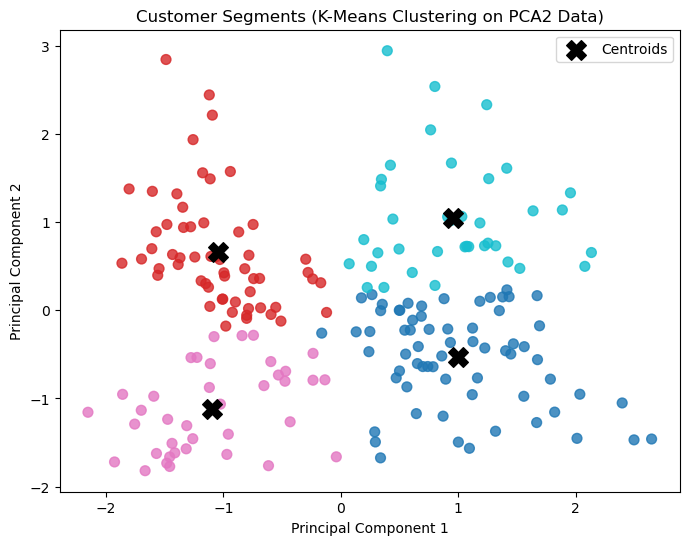

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca2[:,0], data_pca2[:,1], c=labels, cmap='tab10', s=50, alpha=0.8)

# plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, marker='X', label='Centroids')

plt.title("Customer Segments (K-Means Clustering on PCA2 Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

## 2. Heirarchial

In [57]:
import scipy.cluster.hierarchy as sc
from sklearn.cluster import AgglomerativeClustering

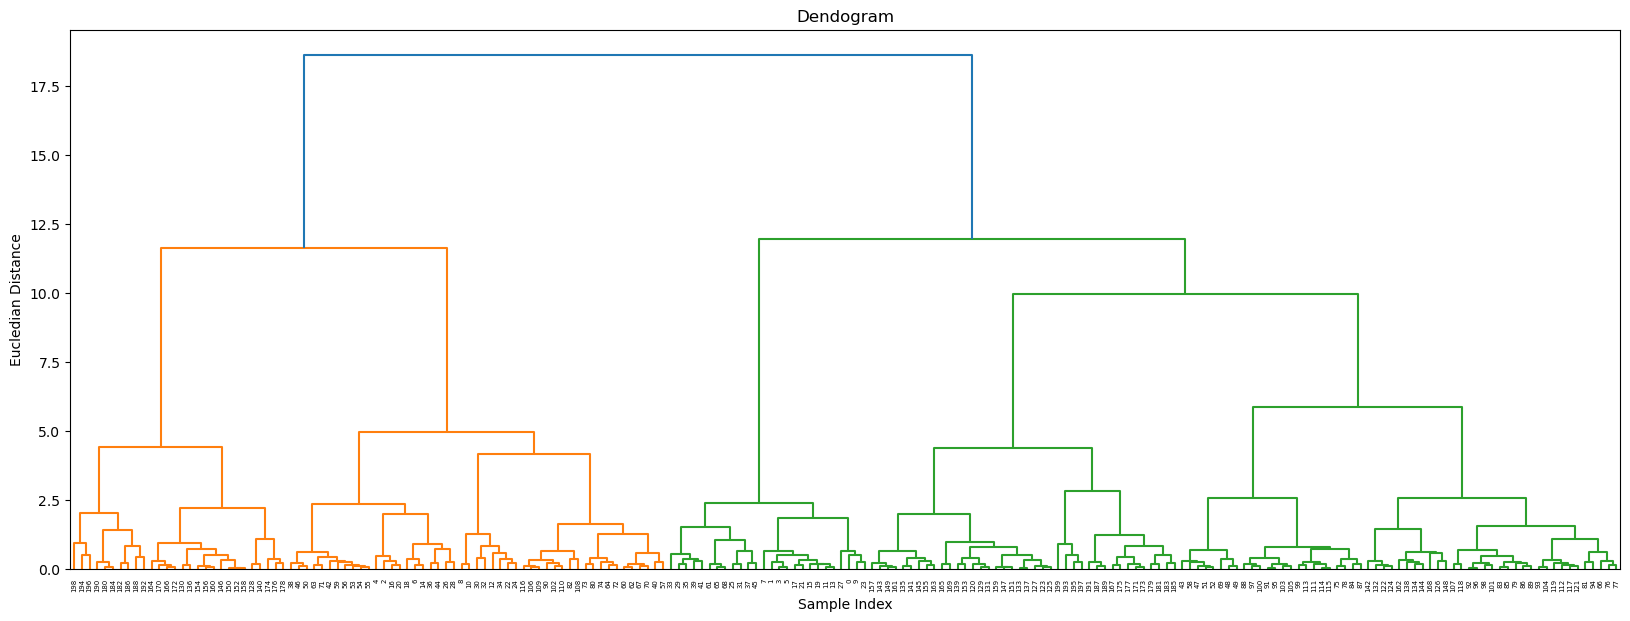

In [58]:
plt.figure(figsize=(20,7))
Z = sc.linkage(data_pca2, method="ward")
sc.dendrogram(Z)
plt.title("Dendogram")
plt.xlabel("Sample Index")
plt.ylabel("Eucledian Distance")
plt.show()

In [59]:
for k in [3, 4]:
    cluster = AgglomerativeClustering(n_clusters=k,metric="euclidean",linkage="ward")
    labels = cluster.fit_predict(data_pca2)
    sil = silhouette_score(data_pca2, labels)
    print(f"k={k}, silhouette={sil:.4f}")

k=3, silhouette=0.3206
k=4, silhouette=0.3552


In [60]:
for k in [3, 4]:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(data_pca2)
    dbi = davies_bouldin_score(data_pca2, labels)
    print(f"k={k}, DBI ={dbi:.4f}")

k=3, DBI =0.8226
k=4, DBI =0.8247


In [61]:
for k in [3, 4]:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(data_pca2)
    ch  = calinski_harabasz_score(data_pca2, labels)
    print(f"k={k}, CH ={ch:.4f}")

k=3, CH =160.1835
k=4, CH =182.0798


In [62]:
cluster = AgglomerativeClustering(n_clusters=4,metric="euclidean",linkage="ward")
cluster.fit(data_pca2)

AgglomerativeClustering(n_clusters=4)

In [63]:
labels_hi =cluster.labels_

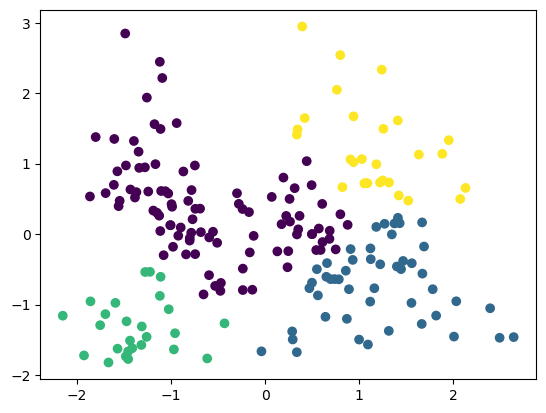

In [64]:
plt.scatter(data_pca2[:,0],data_pca2[:,1],c=labels_hi)
plt.show()

## 3. DBSCAN

In [65]:
from sklearn.cluster import DBSCAN

In [66]:
dbscan=DBSCAN(eps=0.4,min_samples=7)

In [67]:
dbscan.fit(data_pca2)

DBSCAN(eps=0.4, min_samples=7)

In [68]:
dbscan.labels_

array([-1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,
        0, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1,  1,  0, -1,  0, -1, -1,
       -1,  0,  1,  0,  1,  0,  1,  0,  1,  2,  1, -1,  1,  2,  2,  2,  1,
        2,  2,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  2,  1,  1,
        2,  2,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  2,
        1,  1,  2,  2,  1,  1,  2,  1,  1,  1,  2,  1,  2,  1,  2,  2,  1,
        1,  2,  1,  2,  1,  1,  1,  1,  1,  2,  1,  2,  2,  2,  1,  1,  1,
        1,  2,  1,  1,  2,  1,  2,  1,  2, -1,  2,  1,  2,  1,  2,  1,  2,
        1,  2,  1,  2, -1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,
        2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,
        1,  2,  1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1, -1, -1,
        2, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

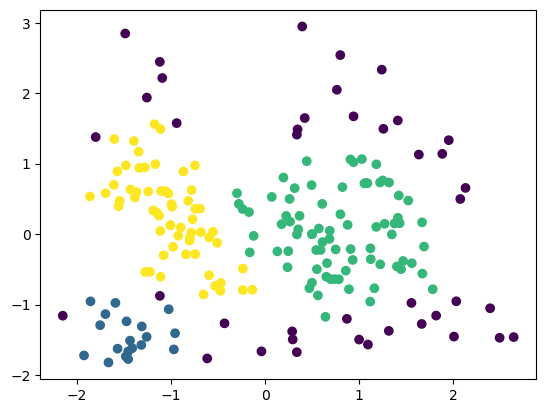

In [69]:
plt.scatter(data_pca2[:,0],data_pca2[:,1],c=dbscan.labels_)
plt.show()

In [70]:
dbscan=DBSCAN(eps=0.4,min_samples=7)
labels = dbscan.fit_predict(data_pca2)
sil = silhouette_score(data_pca2, labels)
print(f"silhouette={sil:.4f}")

silhouette=0.3159


In [71]:
dbscan=DBSCAN(eps=0.4,min_samples=7)
labels = dbscan.fit_predict(data_pca2)
dbi = davies_bouldin_score(data_pca2, labels)
print(f"dbi={dbi:.4f}")

dbi=6.2201


In [72]:
dbscan=DBSCAN(eps=0.4,min_samples=7)
labels = dbscan.fit_predict(data_pca2)
ch  = calinski_harabasz_score(data_pca2, labels)
print(f"CH={ch:.4f}")

CH=56.0657


## 4. HDBSCAN

In [73]:
from sklearn.cluster import HDBSCAN

In [74]:
for k in range(3,10):
    hdb = HDBSCAN(metric = "euclidean",min_cluster_size=k)
    labels = hdb.fit_predict(data_pca2)
    sil = silhouette_score(data_pca2, labels)
    print(f"k={k}, sil ={sil:.4f}")

k=3, sil =0.0853
k=4, sil =0.0618
k=5, sil =-0.0248
k=6, sil =0.2555
k=7, sil =0.1052
k=8, sil =0.0964
k=9, sil =0.0934


In [81]:
hdb = HDBSCAN(metric = "euclidean",min_cluster_size=6)

In [82]:
hdb.fit(data_pca2)

HDBSCAN(min_cluster_size=6)

In [83]:
hdb.labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1,  0, -1,  0, -1,
        0, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1, -1,
       -1,  0, -1,  0,  1,  0, -1, -1,  1, -1,  1, -1,  1,  2,  2,  2,  1,
        2,  2,  1,  1,  1,  1,  1,  2,  1,  1, -1,  1,  1,  1, -1,  1,  1,
       -1,  2,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1, -1,  1,  1,  2,
        1,  1,  2,  2,  1,  1,  2,  1,  1,  1,  2,  1,  2,  1,  2,  2,  1,
        1,  2,  1,  2,  1,  1,  1,  1,  1,  2,  1,  2,  2,  2,  1,  1,  1,
        1,  2,  1,  1,  2,  1,  2,  1,  2, -1,  2,  1,  2, -1,  2,  1,  2,
        1,  2,  1,  2, -1,  2, -1,  2,  1, -1,  1,  2,  1,  2,  1,  2,  1,
        2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2, -1, -1,
        1,  2,  1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

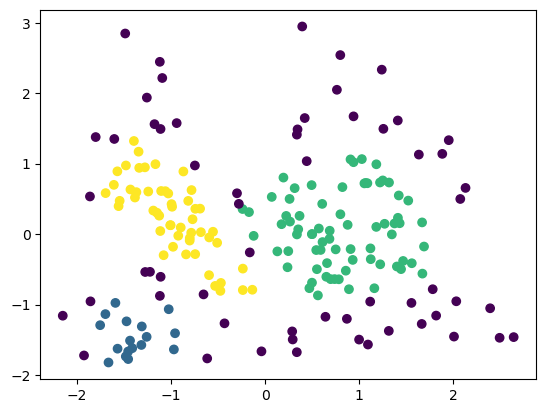

In [84]:
plt.scatter(data_pca2[:,0],data_pca2[:,1],c=hdb.labels_)
plt.show()

In [85]:
sil = silhouette_score(data_pca2, hdb.labels_)
sil

np.float64(0.25545644346108654)

In [86]:
dbi = davies_bouldin_score(data_pca2, hdb.labels_)
dbi

np.float64(3.043563278426581)

## .

In [87]:
df_clusters = scaled_df.copy()   
df_clusters['Cluster'] = kmeans.labels_

In [88]:
cluster_means = df_clusters.groupby('Cluster').mean(numeric_only=True)
print(cluster_means)

              Age  Annual Income  Spending Score
Cluster                                         
0        0.973091      -0.578880       -0.404803
1       -0.635135       0.707135        0.798787
2       -0.950531      -1.066012        0.671613
3        0.229842       0.992124       -1.187735


In [89]:
cluster_medians = df_clusters.groupby('Cluster').median(numeric_only=True)
print(cluster_medians)

              Age  Annual Income  Spending Score
Cluster                                         
0        0.800199      -0.479408       -0.163051
1       -0.599252       0.589336        0.943364
2       -1.065735      -1.051949        0.729845
3        0.297832       0.742014       -1.308287


In [90]:
cluster_sizes = df_clusters['Cluster'].value_counts().sort_index()
print(cluster_sizes)

Cluster
0    66
1    58
2    38
3    38
Name: count, dtype: int64


In [91]:
persona_map = {
    0: "High Income - Low Spending",
    1: "High Income - High Spending",
    2: "Low Income - Low Spending",
    3: "Low Income - High Spending"
}

df_clusters["Persona"] = df_clusters["Cluster"].map(persona_map)

df_clusters

,Age,Annual Income,Spending Score,Cluster,Persona
0,-1.424569,-1.738999,-0.434801,2,Low Income - Low Spending
1,-1.281035,-1.738999,1.195704,2,Low Income - Low Spending
2,-1.352802,-1.700830,-1.715913,0,High Income - Low Spending
3,-1.137502,-1.700830,1.040418,2,Low Income - Low Spending
4,-0.563369,-1.662660,-0.395980,2,Low Income - Low Spending
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,1,High Income - High Spending
196,0.441365,2.497807,-0.861839,3,Low Income - High Spending
197,-0.491602,2.497807,0.923953,1,High Income - High Spending
198,-0.491602,2.917671,-1.250054,3,Low Income - High Spending


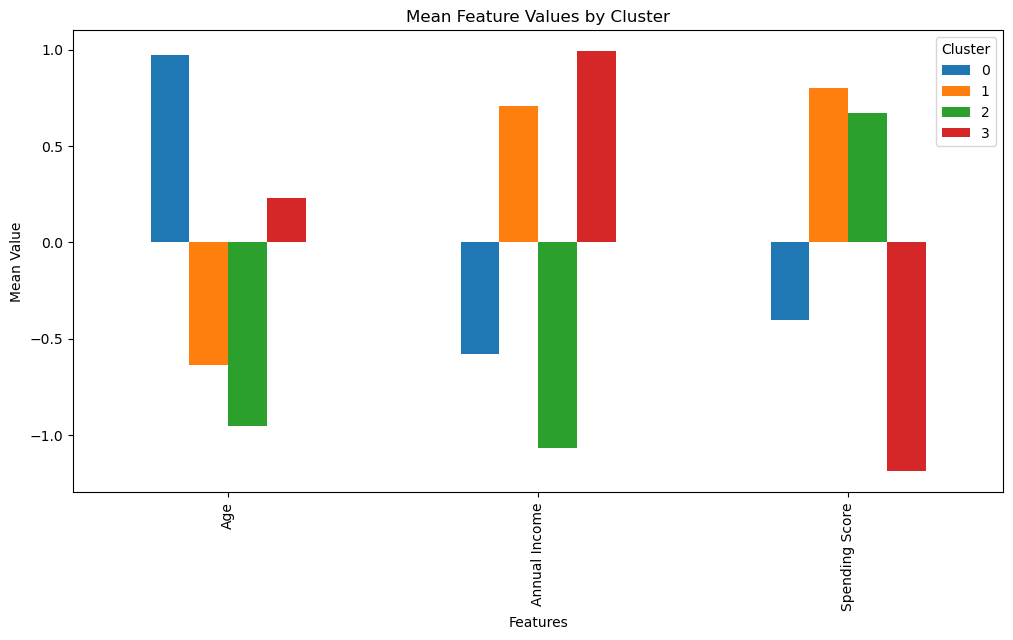

In [92]:
cluster_means.T.plot(kind='bar', figsize=(12,6))
plt.title('Mean Feature Values by Cluster')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.legend(title='Cluster')
plt.show()